**NOTE**

don't run all cell / notebook

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import pandas as pd
pd.options.display.max_columns = 33

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Original dataset from kaggle: https://www.kaggle.com/datasets/mexwell/steamgames
from google.colab import files
upload = files.upload()

Saving games.csv to games.csv


#Data Cleaning and Feature Selection

In [ ]:
df = pd.read_csv('games.csv')

df['Release date'] = pd.to_datetime(df['Release date'], format='%b %d, %Y', errors='coerce')
df['Release_date_day'] = df['Release date'].dt.day
df['Release_date_month'] = df['Release date'].dt.month
df['Release date_year'] = df['Release date'].dt.year

# filter = df['Release date'].dt.year>=2018
# df = df[filter]

df = df.drop(columns=['Screenshots',
                      'Movies',
                      'Website',
                      'Support url',
                      'Support email',
                      'Header image',
                      'Metacritic url',
                      'Metacritic score',
                      'Notes',
                      'Score rank',
                      'Reviews',
                      'Recommendations',
                      'Tags',
                      'About the game',
                      'Categories'],axis=0)
df = df.dropna()


In [ ]:
df.to_csv('new_games.csv',index=False)

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Egsy05/FinalProject_dibimbing/main/new_games_full.csv')

In [ ]:
df1 = df1.drop(columns=['Supported languages','Full audio languages'])

In [ ]:
df1.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Genres,Release_date_day,Release_date_month,Release date_year
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,True,False,False,0,6,11,30,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Casual,Indie,Sports",21.0,10.0,2008.0
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,True,True,False,0,53,5,12,0,0,0,0,Rusty Moyher,Wild Rooster,"Action,Indie",12.0,10.0,2017.0
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,True,False,False,0,0,0,0,0,0,0,0,Campião Games,Campião Games,"Action,Adventure,Indie,Strategy",17.0,11.0,2021.0
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,True,True,True,0,3,0,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Adventure,Casual,Indie",23.0,7.0,2020.0
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,True,True,False,0,50,8,17,0,0,0,0,Unusual Games,Unusual Games,"Adventure,Indie",3.0,2.0,2020.0


In [ ]:
df1.describe()

,AppID,Peak CCU,Required age,Price,DLC count,User score,Positive,Negative,Achievements,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Release_date_day,Release_date_month,Release date_year
count,6.874700e+04,68747.000000,68747.000000,68747.000000,68747.000000,68747.000000,6.874700e+04,68747.000000,68747.000000,68747.000000,68747.000000,68747.000000,68747.000000,68747.000000,68747.000000,68747.000000
mean,1.179266e+06,145.075829,0.352743,7.484446,0.637177,0.046911,1.143114e+03,187.317948,22.449591,122.881566,11.912796,110.246702,12.799366,15.987345,6.602877,2019.235574
std,5.905455e+05,5910.834939,2.393114,11.197122,15.244777,1.941871,2.697411e+04,5070.125064,189.492061,1253.868803,194.688833,1674.608668,213.513386,8.851438,3.481082,2.770994
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1997.000000
25%,6.902550e+05,0.000000,0.000000,0.990000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2018.000000
50%,1.151620e+06,0.000000,0.000000,4.990000,0.000000,0.000000,1.000000e+01,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,16.000000,7.000000,2020.000000
75%,1.655885e+06,1.000000,0.000000,9.990000,0.000000,0.000000,6.300000e+01,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,24.000000,10.000000,2021.000000
max,2.367730e+06,872138.000000,21.000000,999.000000,2366.000000,100.000000,5.764420e+06,895978.000000,9821.000000,145727.000000,10996.000000,208473.000000,10996.000000,31.000000,12.000000,2025.000000


In [ ]:
df1['Peak CCU'].sum()

9973528

#Exploring Data and Analysis

##top developers (by user)

In [ ]:
df1.groupby(['Developers']).agg(count_user=('Peak CCU','sum')).sort_values(by='count_user',ascending=False).head(20)

,count_user
Developers,
Avalanche Software,872176
"Valve,Hidden Path Entertainment",825215
Valve,744768
Endnight Games Ltd,415273
"CAPCOM Co., Ltd.",288033
Smilegate RPG,287501
"KRAFTON, Inc.",275399
Respawn Entertainment,242291
"Infinity Ward,Raven Software,Beenox,Treyarch,High Moon Studios,Sledgehammer Games,Activision Shanghai,Demonware,Toys for Bob",233454


##top publisher (by user)

In [ ]:
df1.groupby(['Publishers']).agg(count_user=('Peak CCU','sum')).sort_values(by='count_user',ascending=False).head(20)

,count_user
Publishers,
Valve,1607757
Warner Bros. Games,946739
Electronic Arts,565318
Newnight,405191
Amazon Games,304189
"CAPCOM Co., Ltd.",288013
"KRAFTON, Inc.",287922
Activision,245250
SEGA,215079


seperate between dev and publisher (if dev = publisher)

we are going to find a publisher that are not as same as the developers

In [ ]:
publisher_df = df1[df1['Developers']!=df1['Publishers']]

In [ ]:
publisher_df.groupby(['Publishers']).agg(count_user=('Peak CCU','sum')).sort_values(by='count_user',ascending=False).head(20)

,count_user
Publishers,
Warner Bros. Games,946739
Valve,862989
Electronic Arts,565139
Newnight,405191
Amazon Games,287501
Activision,245241
SEGA,208215
Paradox Interactive,195330
Rockstar Games,175274


##which dev that has high profit

In [ ]:
dev_profit = df1[['Developers','Peak CCU','Price']]
dev_profit['Profit'] = df1['Peak CCU']*df1['Price']
dev_profit.groupby(['Developers']).agg(total_user = ('Peak CCU','sum'),profit = ('Profit','sum')).sort_values('profit',ascending=False).head(20)

,total_user,profit
Developers,,
Avalanche Software,872176,52320288.24
"Infinity Ward,Raven Software,Beenox,Treyarch,High Moon Studios,Sledgehammer Games,Activision Shanghai,Demonware,Toys for Bob",233454,16339445.46
"CAPCOM Co., Ltd.",288033,16219898.63
Endnight Games Ltd,415273,12353217.27
EA Canada & EA Romania,140224,9068067.76
"KOEI TECMO GAMES CO., LTD.",105641,6473125.19
Paradox Development Studio,141805,6262679.03
Sports Interactive,128185,5647516.57
"Insomniac Games,Nixxes Software",75232,4388407.68


##publisher that has high profit

In [ ]:
pub_profit = publisher_df[['Publishers', 'Peak CCU','Price']]
pub_profit['Profit'] = pub_profit['Peak CCU']*pub_profit['Price']
pub_profit.groupby(['Publishers']).agg(users = ('Peak CCU','sum'),profit = ('Profit','sum')).sort_values('profit',ascending=False).head(20)


,users,profit
Publishers,,
Warner Bros. Games,946739,55769212.61
Electronic Arts,565139,17024241.11
Activision,245241,16742335.64
Newnight,405191,12151678.09
SEGA,208215,9993110.53
Paradox Interactive,195330,8093983.55
PlayStation PC LLC,120170,6863399.65
2K,91340,4948211.57
Xbox Game Studios,106742,3956497.78


##games developed by high profit developers

In [ ]:
dev_profit['Games'] = df1['Name']
dev_profit.groupby(['Developers','Games']).agg(total_user = ('Peak CCU','sum'),profit = ('Profit','sum')).sort_values('profit',ascending=False).head(20)

total_user  \
Developers                                         Games                                           
Avalanche Software                                 Hogwarts Legacy                        872138   
Infinity Ward,Raven Software,Beenox,Treyarch,Hi... Call of Duty®: Modern Warfare® II      233454   
Endnight Games Ltd                                 Sons Of The Forest                     405191   
CAPCOM Co., Ltd.                                   Resident Evil 4                        153726   
                                                   MONSTER HUNTER RISE                     99009   
EA Canada & EA Romania                             EA SPORTS™ FIFA 23                      65603   
                                                   FIFA 22                                 74621   
Facepunch Studios                                  Rust                                    96112   
Insomniac Games,Nixxes Software                    Marvel’s Spider-Man Remastered          62756   
Sports Interactive                                 Football Manager 2022                   66097   
KOEI TECMO GAMES CO., LTD.                         Wo Long: Fallen Dynasty                 59368   
Studio Wildcard,Instinct Games,Efecto Studios,V... ARK: Survival Evolved                   98215   
Paradox Development Studio                         Victoria 3                              57902   
FromSoftware Inc.                                  ELDEN RING                              46431   
Fatshark                                           Warhammer 40,000: Darktide              63616   
Firaxis Games,Aspyr (Mac),Aspyr (Linux)            Sid Meier’s Civilization® VI            37024   
Player First Games                                 MultiVersus                             51283   
Sports Interactive                                 Football Manager 2023                   41798   
KOEI TECMO GAMES CO., LTD.                         WILD HEARTS™                            28008   
Bohemia Interactive                                DayZ                                    39862   

                                                                                           profit  
Developers                                         Games                                           
Avalanche Software                                 Hogwarts Legacy                    52319558.62  
Infinity Ward,Raven Software,Beenox,Treyarch,Hi... Call of Duty®: Modern Warfare® II  16339445.46  
Endnight Games Ltd                                 Sons Of The Forest                 12151678.09  
CAPCOM Co., Ltd.                                   Resident Evil 4                     9222022.74  
                                                   MONSTER HUNTER RISE                 5939549.91  
EA Canada & EA Romania                             EA SPORTS™ FIFA 23                  4591553.97  
                                                   FIFA 22                             4476513.79  
Facepunch Studios                                  Rust                                3843518.88  
Insomniac Games,Nixxes Software                    Marvel’s Spider-Man Remastered      3764732.44  
Sports Interactive                                 Football Manager 2022               3634674.03  
KOEI TECMO GAMES CO., LTD.                         Wo Long: Fallen Dynasty             3561486.32  
Studio Wildcard,Instinct Games,Efecto Studios,V... ARK: Survival Evolved               2945467.85  
Paradox Development Studio                         Victoria 3                          2894520.98  
FromSoftware Inc.                                  ELDEN RING                          2785395.69  
Fatshark                                           Warhammer 40,000: Darktide          2544003.84  
Firaxis Games,Aspyr (Mac),Aspyr (Linux)            Sid Meier’s Civilization® VI        2221069.76  
Player First Games                                 MultiVersus                       

##games published by high profit publishers

In [ ]:
pub_profit['Games'] = publisher_df['Name']
pub_profit.groupby(['Publishers','Games']).agg(total_user = ('Peak CCU','sum'),profit = ('Profit','sum')).sort_values('profit',ascending=False).head(20)

total_user  \
Publishers                                   Games                                           
Warner Bros. Games                           Hogwarts Legacy                        872138   
Activision                                   Call of Duty®: Modern Warfare® II      233454   
Newnight                                     Sons Of The Forest                     405191   
Electronic Arts                              EA SPORTS™ FIFA 23                      65603   
                                             FIFA 22                                 74621   
PlayStation PC LLC                           Marvel’s Spider-Man Remastered          62756   
SEGA                                         Football Manager 2022                   66097   
KOEI TECMO GAMES CO., LTD.,CE-Asia(Asia)     Wo Long: Fallen Dynasty                 59368   
Studio Wildcard                              ARK: Survival Evolved                   98215   
Paradox Interactive                          Victoria 3                              57902   
FromSoftware Inc.,Bandai Namco Entertainment ELDEN RING                              46431   
2K,Aspyr (Mac),Aspyr (Linux)                 Sid Meier’s Civilization® VI            37024   
Warner Bros. Games                           MultiVersus                             51283   
SEGA Europe                                  Football Manager 2023                   41798   
Electronic Arts                              WILD HEARTS™                            28008   
SEGA                                         Persona 5 Royal                         28661   
                                             Company of Heroes 3                     28658   
2K                                           NBA 2K22                                28478   
Paradox Interactive                          Hearts of Iron IV                       42442   
Electronic Arts                              Dead Space                              28292   

                                                                                     profit  
Publishers                                   Games                                           
Warner Bros. Games                           Hogwarts Legacy                    52319558.62  
Activision                                   Call of Duty®: Modern Warfare® II  16339445.46  
Newnight                                     Sons Of The Forest                 12151678.09  
Electronic Arts                              EA SPORTS™ FIFA 23                  4591553.97  
                                             FIFA 22                             4476513.79  
PlayStation PC LLC                           Marvel’s Spider-Man Remastered      3764732.44  
SEGA                                         Football Manager 2022               3634674.03  
KOEI TECMO GAMES CO., LTD.,CE-Asia(Asia)     Wo Long: Fallen Dynasty             3561486.32  
Studio Wildcard                              ARK: Survival Evolved               2945467.85  
Paradox Interactive                          Victoria 3                          2894520.98  
FromSoftware Inc.,Bandai Namco Entertainment ELDEN RING                          2785395.69  
2K,Aspyr (Mac),Aspyr (Linux)                 Sid Meier’s Civilization® VI        2221069.76  
Warner Bros. Games                           MultiVersus                         2050807.17  
SEGA Europe                                  Football Manager 2023               2005886.02  
Electronic Arts                              WILD HEARTS™                        1960279.92  
SEGA                                         Persona 5 Royal                     1719373.39  
                                             Company of Heroes 3                 1719193.42  
2K                                           NBA 2K22                            1708395.22  
Paradox Interactive                          Hearts of Iron IV                   1697255.58  
Electronic Arts                      

##fav os by top dev

In [ ]:
df1['Windows'].count()
df1['Mac'].count()
df1['Linux'].count()


68747

In [ ]:
df1.groupby(['Developers']).agg(users=('Peak CCU','sum'),
                                windo=('Windows','sum'),
                                mac=('Mac','sum'),
                                linux=('Linux','sum')).sort_values('users',ascending=False).head(20)

,users,windo,mac,linux
Developers,,,,
Avalanche Software,872176,6,0,0
"Valve,Hidden Path Entertainment",825215,1,1,1
Valve,744768,32,27,27
Endnight Games Ltd,415273,2,0,0
"CAPCOM Co., Ltd.",288033,30,0,0
Smilegate RPG,287501,1,0,0
"KRAFTON, Inc.",275399,2,0,0
Respawn Entertainment,242291,4,0,0
"Infinity Ward,Raven Software,Beenox,Treyarch,High Moon Studios,Sledgehammer Games,Activision Shanghai,Demonware,Toys for Bob",233454,3,0,0


#Feature selection and engineering

##Games With high users 2018 - 2023

In [ ]:
df1.groupby(['Name']).agg(user=('Peak CCU','max')).sort_values(by='user',ascending=False).reset_index()

,Name,user
0,Hogwarts Legacy,872138
1,Sons Of The Forest,405191
2,Lost Ark,287501
3,Apex Legends™,235067
4,Call of Duty®: Modern Warfare® II,233454
...,...,...
51965,Marpi ᵒˢ,0
51966,Marrakech,0
51967,Marriage to the demon wife!,0
51968,Mars 2055,0


##How many profit in high users games?

In [ ]:
df2 = df1[['Name', 'Peak CCU','Price']]
df2["Profit"] = df1['Peak CCU']*df1['Price']
df2.sort_values(by='Profit',ascending=False)

,Name,Peak CCU,Price,Profit
66664,Hogwarts Legacy,872138,59.99,52319558.62
62776,Call of Duty®: Modern Warfare® II,233454,69.99,16339445.46
67250,Sons Of The Forest,405191,29.99,12151678.09
68283,Resident Evil 4,153726,59.99,9222022.74
37909,MONSTER HUNTER RISE,99009,59.99,5939549.91
...,...,...,...,...
11977,Snowball Saves Summer,0,9.99,0.00
34566,OrdinaryFamily,0,0.99,0.00
34567,Smackball,0,4.99,0.00
34568,Hexogin,0,9.99,0.00


##How is the review in high users games?

In [ ]:
df2['Positive_Negative_dif'] = df1['Positive']-df1['Negative']
df2.sort_values(by='Peak CCU',ascending=False)

,Name,Peak CCU,Price,Profit,Positive_Negative_dif
66664,Hogwarts Legacy,872138,59.99,52319558.62,31521
44570,Counter-Strike: Global Offensive,825215,0.00,0.00,4997743
16979,Dota 2,558759,0.00,0.00,1176716
67250,Sons Of The Forest,405191,29.99,12151678.09,25052
46017,Lost Ark,287501,0.00,0.00,80242
...,...,...,...,...,...
12134,Santa in search of toys,0,3.99,0.00,11
35152,NAVE : SOS MARS,0,0.99,0.00,0
35153,Puzzles By Axis Hyper,0,1.99,0.00,9
12132,The Interview,0,1.99,0.00,-60


##What makes these games so popular? Developers? Publisher? Review? DLC? Achievements?

In [ ]:
df2['Developers'] = df1['Developers']
df2['Publishers'] = df1['Publishers']
df2['DLC'] = df1['DLC count']
df2['Achievements'] = df1['Achievements']
df2.groupby(['Name','Developers','Publishers']).agg(DLC=('DLC','max'),Achievement=('Achievements','max'),Review=('Positive_Negative_dif','max'),Profit=('Profit','max')).sort_values(by='Profit',ascending=False)

,,,DLC,Achievement,Review,Profit
Name,Developers,Publishers,,,,
Hogwarts Legacy,Avalanche Software,Warner Bros. Games,1,45,31521,52319558.62
Call of Duty®: Modern Warfare® II,"Infinity Ward,Raven Software,Beenox,Treyarch,High Moon Studios,Sledgehammer Games,Activision Shanghai,Demonware,Toys for Bob",Activision,1,24,3274,16339445.46
Sons Of The Forest,Endnight Games Ltd,Newnight,0,28,25052,12151678.09
Resident Evil 4,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",9,39,20508,9222022.74
MONSTER HUNTER RISE,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",135,92,31695,5939549.91
...,...,...,...,...,...,...
Mambo Wave,Game Breaker Studios,HaDe Games,1,6,70,0.00
Man 2,Kman Studios,Kman Studios,0,0,0,0.00
Man 3: The Social Media Wars,Kman Studios,Kman Studios,0,0,0,0.00


##How long has this game with the highest users been?

In [ ]:
df1['Release_date_day'] = df1['Release_date_day'].astype(int)
df1['Release_date_month'] = df1['Release_date_month'].astype(int)
df1['Release date_year'] = df1['Release date_year'].astype(int)

In [ ]:
df1['date_str'] = df1['Release_date_day'].astype(str) + '-' + df1['Release_date_month'].astype(str) + '-' + df1['Release date_year'].astype(str)

In [ ]:
df1["Release_date"] = pd.to_datetime(df1['date_str'], format='%d-%m-%Y')

In [ ]:
df1 = df1.drop(columns='date_str',axis=0)
current_date = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
df2['Release_date'] = df1["Release_date"]
df2['days_since_release'] = (current_date-df1["Release_date"]).dt.days
df2.sort_values(by='Peak CCU',ascending=False)

,Name,Peak CCU,Price,Profit,Positive_Negative_dif,Developers,Publishers,DLC,Achievements,Release_date,days_since_release
66664,Hogwarts Legacy,872138,59.99,52319558.62,31521,Avalanche Software,Warner Bros. Games,1,45,2023-02-10,474
44570,Counter-Strike: Global Offensive,825215,0.00,0.00,4997743,"Valve,Hidden Path Entertainment",Valve,1,167,2012-08-21,4299
16979,Dota 2,558759,0.00,0.00,1176716,Valve,Valve,2,0,2013-07-09,3977
67250,Sons Of The Forest,405191,29.99,12151678.09,25052,Endnight Games Ltd,Newnight,0,28,2023-02-23,461
46017,Lost Ark,287501,0.00,0.00,80242,Smilegate RPG,Amazon Games,4,156,2022-02-11,838
...,...,...,...,...,...,...,...,...,...,...,...
12134,Santa in search of toys,0,3.99,0.00,11,Laush Dmitriy Sergeevich,Laush Studio,0,45,2019-01-19,1957
35152,NAVE : SOS MARS,0,0.99,0.00,0,ANEMONA GAMES,ANEMONA GAMES,0,0,2020-03-18,1533
35153,Puzzles By Axis Hyper,0,1.99,0.00,9,Cubic Bit,Cubic Bit,0,8,2018-09-16,2082
12132,The Interview,0,1.99,0.00,-60,Anothink,Anothink,0,0,2015-02-04,3402


##OS (operating system) in steam games 2018 - 2023

In [ ]:
df2['Windows'] = df1['Windows']
df2['Mac'] = df1['Mac']
df2['Linux'] = df1['Linux']
os_mapping = {False: 0, True: 1}
df2['Windows'] = df2['Windows'].map(os_mapping)
df2['Mac'] = df2['Mac'].map(os_mapping)
df2['Linux'] = df2['Linux'].map(os_mapping)
df2

,Name,Peak CCU,Price,Profit,Positive_Negative_dif,Developers,Publishers,DLC,Achievements,Release_date,days_since_release,Windows,Mac,Linux
0,Galactic Bowling,0,19.99,0.00,-5,Perpetual FX Creative,Perpetual FX Creative,0,30,2008-10-21,5699,1,0,0
1,Train Bandit,0,0.99,0.00,48,Rusty Moyher,Wild Rooster,0,12,2017-10-12,2421,1,1,0
2,Jolt Project,0,4.99,0.00,0,Campião Games,Campião Games,0,0,2021-11-17,924,1,0,0
3,Henosis™,0,5.99,0.00,3,Odd Critter Games,Odd Critter Games,0,0,2020-07-23,1406,1,1,1
4,Two Weeks in Painland,0,0.00,0.00,42,Unusual Games,Unusual Games,0,17,2020-02-03,1577,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68742,SUR5,0,0.00,0.00,0,Katharsis,Katharsis,0,6,2023-04-01,424,1,0,0
68743,Prison Life 2,6,10.79,64.74,8,AO Games,AO Games,0,83,2023-03-30,426,1,0,0
68744,Architecture Zeitgeist,0,5.99,0.00,1,Matheus Rudo,Rudo Studios,0,3,2023-03-27,429,1,0,0
68745,Girl's Way to Survive 2: Bloody Museum,0,2.39,0.00,0,绅士游戏工坊,绅士游戏工坊,0,0,2023-04-02,423,1,0,0


#Preprocessing

In [ ]:
df3 = df2.copy()

In [ ]:
df3

,Name,Peak CCU,Price,Profit,Positive_Negative_dif,Developers,Publishers,DLC,Achievements,Release_date,days_since_release,Windows,Mac,Linux
0,Galactic Bowling,0,19.99,0.00,-5,Perpetual FX Creative,Perpetual FX Creative,0,30,2008-10-21,5698,1,0,0
1,Train Bandit,0,0.99,0.00,48,Rusty Moyher,Wild Rooster,0,12,2017-10-12,2420,1,1,0
2,Jolt Project,0,4.99,0.00,0,Campião Games,Campião Games,0,0,2021-11-17,923,1,0,0
3,Henosis™,0,5.99,0.00,3,Odd Critter Games,Odd Critter Games,0,0,2020-07-23,1405,1,1,1
4,Two Weeks in Painland,0,0.00,0.00,42,Unusual Games,Unusual Games,0,17,2020-02-03,1576,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68742,SUR5,0,0.00,0.00,0,Katharsis,Katharsis,0,6,2023-04-01,423,1,0,0
68743,Prison Life 2,6,10.79,64.74,8,AO Games,AO Games,0,83,2023-03-30,425,1,0,0
68744,Architecture Zeitgeist,0,5.99,0.00,1,Matheus Rudo,Rudo Studios,0,3,2023-03-27,428,1,0,0
68745,Girl's Way to Survive 2: Bloody Museum,0,2.39,0.00,0,绅士游戏工坊,绅士游戏工坊,0,0,2023-04-02,422,1,0,0


In [ ]:
df3 = df3.drop(columns =['Name','Developers','Publishers','Release_date'])

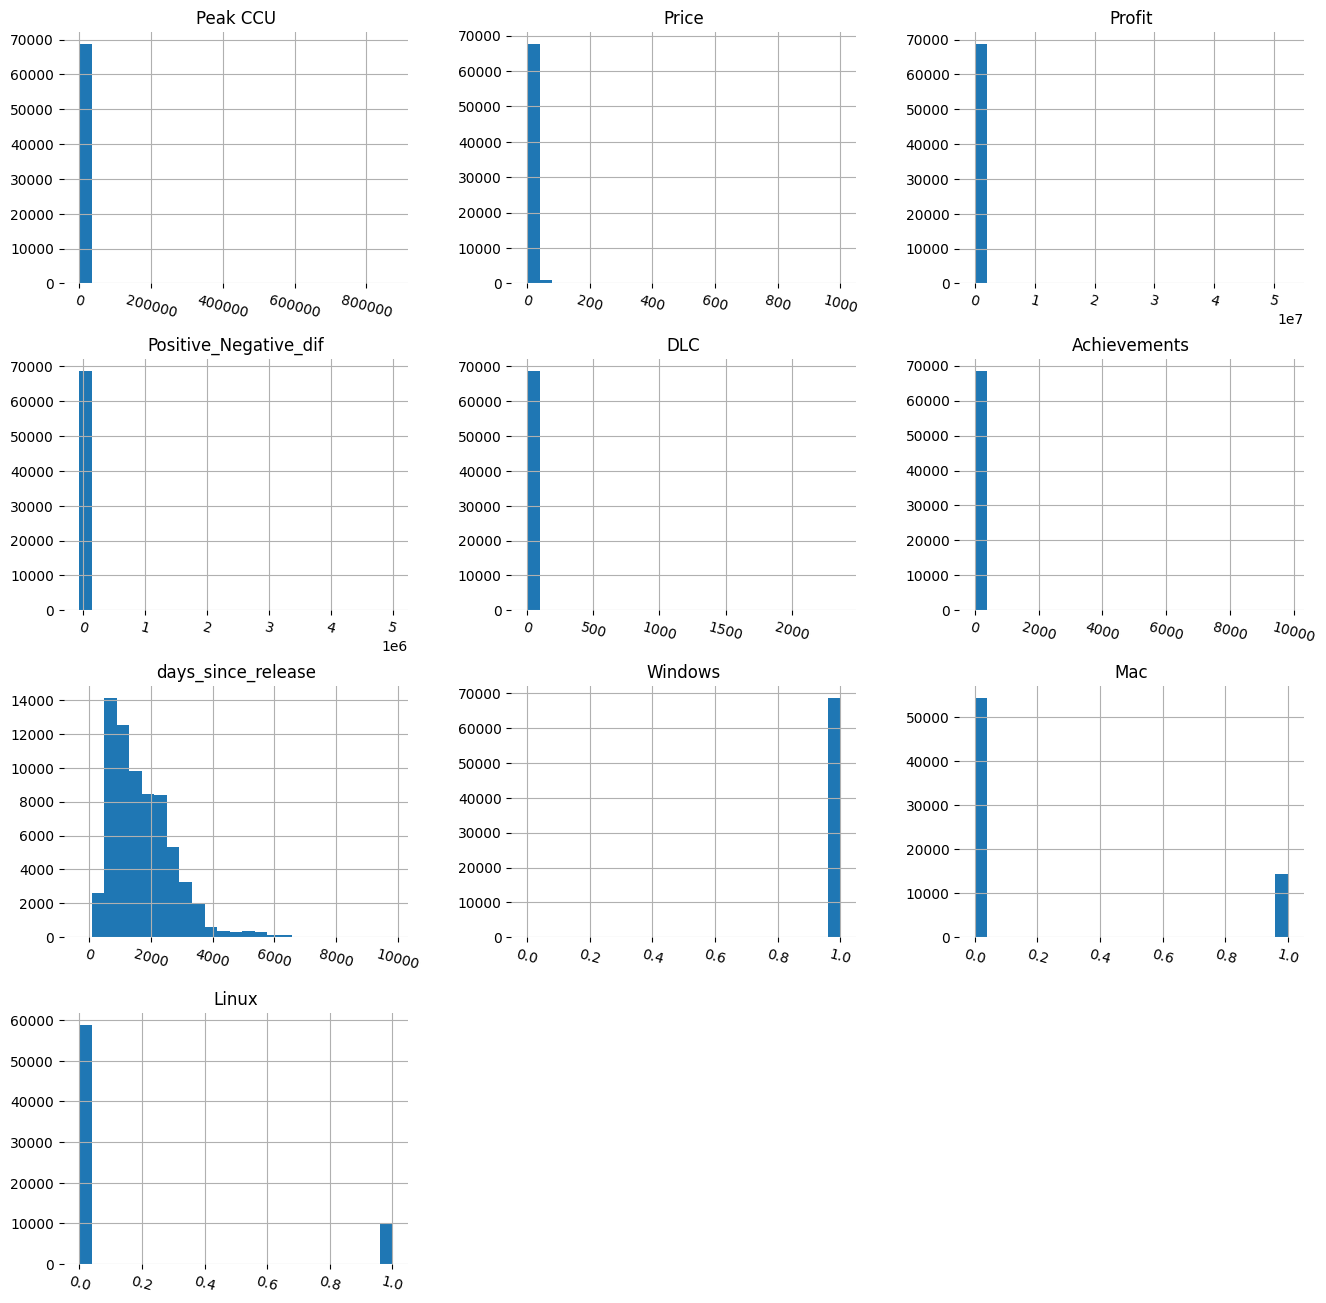

In [ ]:
h = df3.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [ ]:
# log_normalization = df3['days_since_release']
# data_df3 = df3.drop(columns=['days_since_release'])

In [ ]:
# log_normalization = np.log(log_normalization+1)

In [ ]:
# log_normalization.isna().sum()

1

In [ ]:
# log_normalization = log_normalization.dropna()

In [ ]:
scale = StandardScaler()
scaled = scale.fit_transform(df3)

feat = df3.columns
feature_list = list(feat)
feature_list
df3_scaled = pd.DataFrame(data = scaled, columns = feature_list)

In [ ]:
# df4 = df3_scaled.join(log_normalization,how='inner')

In [ ]:
df4

,Peak CCU,Price,Profit,Positive_Negative_dif,DLC,Achievements,Windows,Mac,Linux,days_since_release
0,-0.024544,1.116862,-0.016483,-0.041405,-0.041797,0.039846,0.019073,-0.514249,-0.408830,8.648221
1,-0.024544,-0.580015,-0.016483,-0.039121,-0.041797,-0.055146,0.019073,1.944583,-0.408830,7.792349
2,-0.024544,-0.222777,-0.016483,-0.041190,-0.041797,-0.118473,0.019073,-0.514249,-0.408830,6.829794
3,-0.024544,-0.133468,-0.016483,-0.041060,-0.041797,-0.118473,0.019073,1.944583,2.446004,7.249215
4,-0.024544,-0.668431,-0.016483,-0.039380,-0.041797,-0.028759,0.019073,1.944583,-0.408830,7.363914
...,...,...,...,...,...,...,...,...,...,...
68742,-0.024544,-0.668431,-0.016483,-0.041190,-0.041797,-0.086809,0.019073,-0.514249,-0.408830,6.052089
68743,-0.023529,0.295217,-0.016195,-0.040845,-0.041797,0.319543,0.019073,-0.514249,-0.408830,6.056784
68744,-0.024544,-0.133468,-0.016483,-0.041147,-0.041797,-0.102641,0.019073,-0.514249,-0.408830,6.063785
68745,-0.024544,-0.454982,-0.016483,-0.041190,-0.041797,-0.118473,0.019073,-0.514249,-0.408830,6.049733


In [ ]:
pca = PCA(n_components=3)

pca.fit(df3_scaled)
pcs = pca.transform(df3_scaled)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2','PC 3'])
data_pca

,PC 1,PC 2,PC 3
0,0.193477,-0.675907,1.135629
1,0.070990,-1.255030,-0.363237
2,-0.185514,0.862579,-0.229220
3,0.278521,-2.798999,-0.509804
4,0.017085,-0.986299,-0.499200
...,...,...,...
68742,-0.249465,1.024220,-0.519923
68743,-0.161429,1.000935,0.186874
68744,-0.205400,1.019085,-0.230901
68745,-0.232528,1.024082,-0.415856


#Models

##K-means Cluster

###Finding best K

In [ ]:
inertia = []

for i in range(3, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)


In [ ]:
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range(3, 15):
    kmeans = KMeans(n_clusters=i).fit(data_pca)
    preds = kmeans.predict(data_pca)

    score_euclidean = silhouette_score(data_pca, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

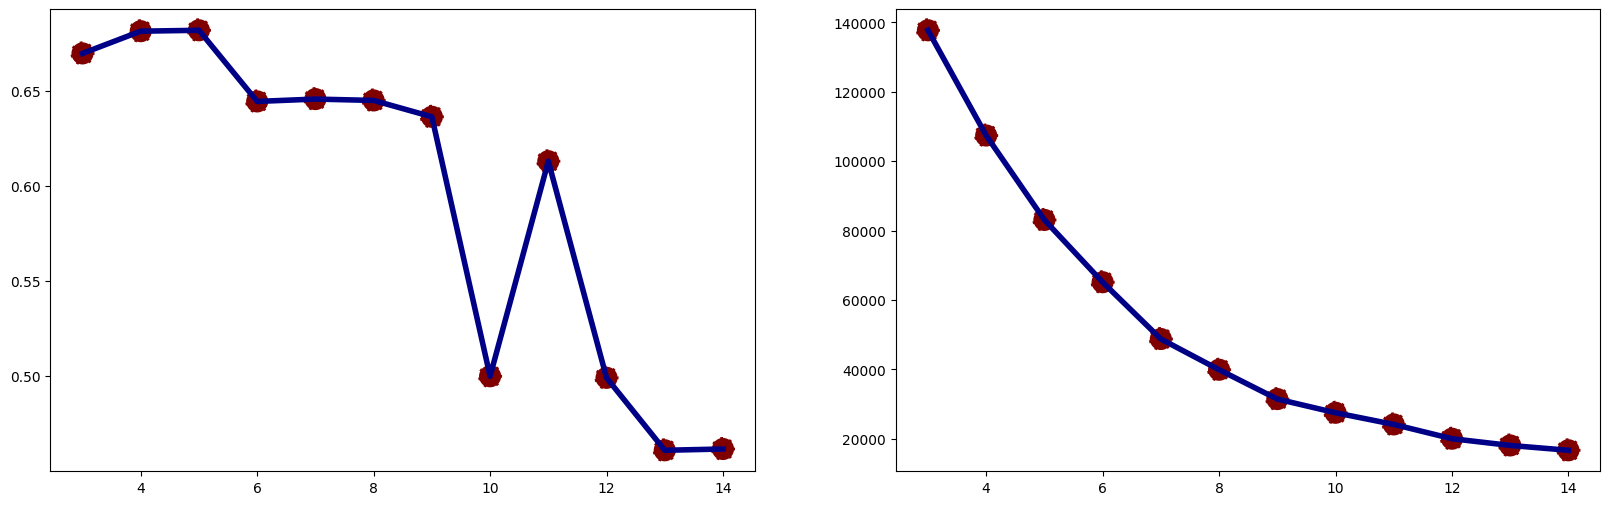

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 6))
sns.lineplot(x=range(3,15), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(3,15), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(3, 15), y=inertia, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(3, 15), y=inertia, s=300, color='#800000',  linestyle='--', ax=ax[1])

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_pca)

KMeans(n_clusters=5, random_state=42)

Segmentasion with K-means and K-medoids

k-means measured by mean
k-medoids meaasured by actual data points (can reduce influence of outlier)

###Result

In [ ]:
df3['clusters'] = kmeans.labels_

In [ ]:
df3.groupby('clusters').agg({
                            'Peak CCU' : ['mean'],
                            'Price' : ['mean'],
                            'Profit' : ['mean'],
                            'Positive_Negative_dif' : ['mean'],
                            'DLC' : ['mean'],
                            'Achievements' : ['mean'],
                            'days_since_release' : ['mean'],
                            'Windows' : ['mean'],
                            'Mac' : ['mean'],
                            'Linux' : ['mean']

}).reset_index()

,clusters,Peak CCU,Price,Profit,Positive_Negative_dif,DLC,Achievements,days_since_release,Windows,Mac,Linux
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,100.147300,7.380521,1.936547e+03,1.656584e+03,0.537656,21.583244,2089.828745,1.000000,0.856148,0.615539
1,1,69.218792,7.263131,2.112062e+03,4.911879e+02,0.407412,13.799756,1585.685633,1.000000,0.012689,0.000000
2,2,848676.500000,29.995000,2.615978e+07,2.514632e+06,1.000000,106.000000,2386.500000,1.000000,0.500000,0.500000
3,3,371.534884,67.592791,7.229960e+03,3.817967e+03,63.372093,2196.395349,1949.260465,0.883721,0.237209,0.106977
4,4,174158.294118,26.464118,3.489121e+06,4.482738e+05,11.000000,77.588235,2414.176471,1.000000,0.352941,0.294118


In [ ]:
data_pca['clusters'] = kmeans.labels_

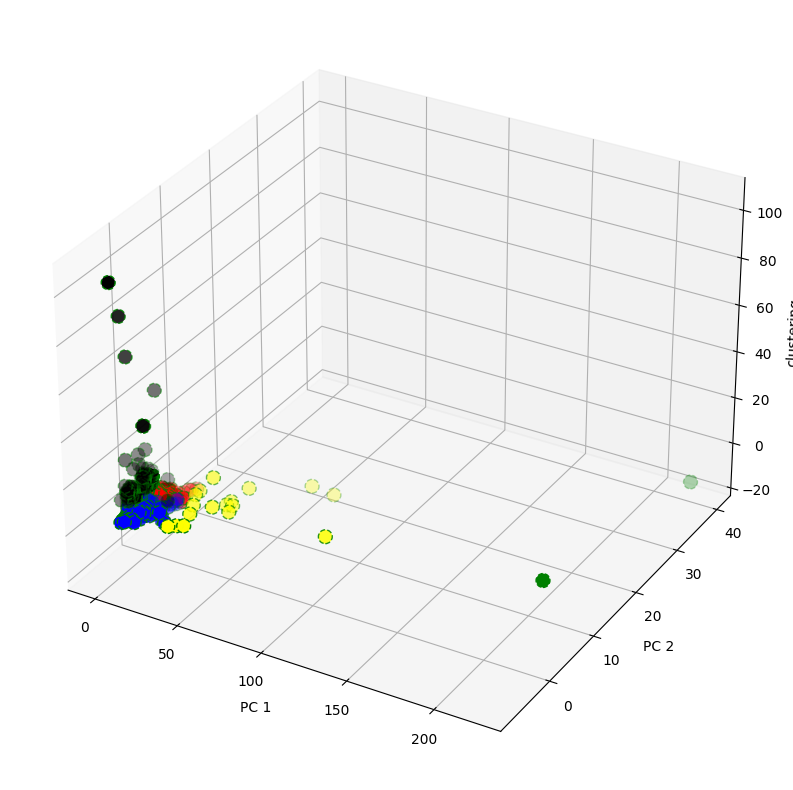

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC 1'][data_pca.clusters == 0], data_pca["PC 2"][data_pca.clusters == 0], data_pca["PC 3"][data_pca.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.clusters == 1], data_pca["PC 2"][data_pca.clusters == 1], data_pca["PC 3"][data_pca.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.clusters == 2], data_pca["PC 2"][data_pca.clusters == 2], data_pca["PC 3"][data_pca.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.clusters == 3], data_pca["PC 2"][data_pca.clusters == 3], data_pca["PC 3"][data_pca.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')
ax.scatter(data_pca['PC 1'][data_pca.clusters == 4], data_pca["PC 2"][data_pca.clusters == 4], data_pca["PC 3"][data_pca.clusters == 4], c='yellow', s=100, edgecolor='green',linestyle='--')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
ax.set_zlabel('clustering')
plt.show()